<a href="https://colab.research.google.com/github/alfir-v10/RushODS_old/blob/main/RUSH_ODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предустановка

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
datasets_path = '/content/drive/MyDrive/MyCourses/ODS Rush/mlcourse.ai/data/'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb

In [77]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Lesson 1
[Лекция 1](https://www.youtube.com/watch?v=OAy96yiWohk&list=PLVlY_7IJCMJdgcCtQfzj5j8OVB_Y0GJCl&index=1&t=4494s&ab_channel=YuryKashnitsky)

## Повторение основ

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
data = pd.read_csv(datasets_path + 'beauty.csv', sep=';')

In [ ]:
data.head(5)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [ ]:
data.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [ ]:
data[(data['female'] == 0) & (data['married'] == 1)].median()

wage         6.71
exper       20.50
union        0.00
goodhlth     1.00
black        0.00
female       0.00
married      1.00
service      0.00
educ        12.00
looks        3.00
dtype: float64

In [ ]:
for look, sub_df in data.groupby("looks"):
    print(look)

    # что угодно
    print(sub_df["goodhlth"].mean())

1
0.8461538461538461
2
0.9366197183098591
3
0.9210526315789473
4
0.9560439560439561
5
1.0


In [ ]:
data.groupby("looks")[['wage', 'exper']].agg(np.mean)

,wage,exper
looks,,
1,4.621538,27.000000
2,5.328803,18.922535
3,6.504598,19.491690
4,6.299341,15.406593
5,7.388421,11.631579


In [ ]:
data.groupby('female')[['looks', 'wage']].agg(np.mean)

,looks,wage
female,,
0,3.177184,7.368823
1,3.201835,4.299358


In [ ]:
pd.crosstab(data['female'], data['married'])

married,0,1
female,,
0,166,658
1,223,213


In [ ]:
pd.crosstab(data['female'], data['looks'])

looks,1,2,3,4,5
female,,,,,
0,8,88,489,228,11
1,5,54,233,136,8


In [ ]:
data['is_rich'] = (data['wage'] < data['wage'].quantile(0.75)).astype('int64')

In [ ]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,is_rich
0,5.73,30,0,1,0,1,1,1,14,4,1
1,4.28,28,0,1,0,1,1,0,12,3,1
2,7.96,35,0,1,0,1,0,0,10,4,0
3,11.57,38,0,1,0,0,1,1,16,3,0
4,11.42,27,0,1,0,0,1,0,16,3,0


In [ ]:
def string_gender(female):
  return 'female' if female == 1 else 'male'

In [ ]:
data['female'].apply(string_gender).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [ ]:
d = {1: 'female', 0: 'male'}

In [ ]:
data['union'].map(d).head(10)

0      male
1      male
2      male
3      male
4      male
5      male
6      male
7    female
8      male
9      male
Name: union, dtype: object

In [ ]:
data['female'].apply(lambda female: 'female' if female == 1 else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [ ]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.ma.MaskedArray.__new__
    Create a 

In [ ]:
np.con*?

In [ ]:
?np.array

In [ ]:
salaries = pd.Series([400, 300, 200, 250], index=["Andrew", "Bob", "Charles", "Ann"])

In [ ]:
salaries[salaries > 100]

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64

In [ ]:
salaries['Carl'] = np.nan

In [ ]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [ ]:
salaries.median()

275.0

In [ ]:
salaries.fillna(salaries.median(), inplace=True)

In [ ]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

In [ ]:
np.exp(salaries)

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64

In [ ]:
np.random.randn(5, 3)

array([[-0.42,  0.01, -1.67],
       [-2.07,  0.65, -0.51],
       [ 0.54,  1.53, -3.28],
       [-1.85,  0.67, -1.49],
       [-0.83,  0.91, -0.93]])

In [ ]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                  index=['o1', 'o2', 'o3', 'o4', 'o5'],
                  columns = ['f1', 'f2', 'f3'])

In [ ]:
df1

,f1,f2,f3
o1,0.051704,0.627872,0.349277
o2,0.088349,0.011981,0.749476
o3,-0.074646,-0.092873,1.204957
o4,-0.182949,0.268780,1.088388
o5,-0.991455,0.622016,-1.655282


In [ ]:
df2 = pd.DataFrame(
    {"A": np.random.random(5), "B": ["a", "b", "c", "d", "e"], "C": np.arange(5) > 2}
)
df2

,A,B,C
0,0.930787,a,False
1,0.338997,b,False
2,0.120083,c,False
3,0.516273,d,True
4,0.699207,e,True


In [ ]:
df2.at[3, 'A'], df2.at[1, 'C']

(0.5162727085257521, False)

In [ ]:
df2.loc[[1, 3], ['A', 'C']]

,A,C
1,0.338997,False
3,0.516273,True


In [ ]:
df2.at[0, 'A'] = 1

In [ ]:
df2.loc[1] = [0.5, 'f', 'True']

In [ ]:
df2.head()

,A,B,C
0,1.000000,a,False
1,0.500000,f,True
2,0.120083,c,False
3,0.516273,d,True
4,0.699207,e,True


In [ ]:
df1.columns = ['A', 'B', 'C']

In [ ]:
df1

,A,B,C
o1,0.051704,0.627872,0.349277
o2,0.088349,0.011981,0.749476
o3,-0.074646,-0.092873,1.204957
o4,-0.182949,0.268780,1.088388
o5,-0.991455,0.622016,-1.655282


In [ ]:
df1.at['o2', 'A'] = np.nan
df1.at['o3', 'B'] = np.nan
df1

,A,B,C
o1,0.051704,0.627872,0.349277
o2,NaN,0.011981,0.749476
o3,-0.074646,NaN,1.204957
o4,-0.182949,0.268780,1.088388
o5,-0.991455,0.622016,-1.655282


In [ ]:
df1.isnull()

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,True,False
o4,False,False,False
o5,False,False,False


In [ ]:
df1.dropna(axis = 1, how='any')

,C
o1,0.349277
o2,0.749476
o3,1.204957
o4,1.088388
o5,-1.655282


In [ ]:
df1.dropna(axis = 0, how='any')

,A,B,C
o1,0.051704,0.627872,0.349277
o4,-0.182949,0.268780,1.088388
o5,-0.991455,0.622016,-1.655282


In [ ]:
df1.dropna(how='all')

,A,B,C
o1,0.051704,0.627872,0.349277
o2,NaN,0.011981,0.749476
o3,-0.074646,NaN,1.204957
o4,-0.182949,0.268780,1.088388
o5,-0.991455,0.622016,-1.655282


In [ ]:
df1.fillna(df1['A'].mean())

,A,B,C
o1,0.051704,0.627872,0.349277
o2,-0.299336,0.011981,0.749476
o3,-0.074646,-0.299336,1.204957
o4,-0.182949,0.268780,1.088388
o5,-0.991455,0.622016,-1.655282


In [ ]:
df = pd.read_csv(datasets_path + 'beauty.csv', sep=';')

In [ ]:
df.sort_values(by="wage", ascending=False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [ ]:
df.sort_values(by=["wage", 'educ'], ascending=[False, False]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [ ]:
df.groupby('female')[['educ', 'wage']].agg(np.median)

,educ,wage
female,,
0,12.0,6.41
1,12.0,3.75


In [ ]:
df['goodhlth'].value_counts()

1    1176
0      84
Name: goodhlth, dtype: int64

In [ ]:
df['goodhlth'].mean()

0.9333333333333333

In [ ]:
df[['goodhlth', 'female']].value_counts()

goodhlth  female
1         0         775
          1         401
0         0          49
          1          35
dtype: int64

In [ ]:
df.groupby('female')['goodhlth'].mean()

female
0    0.940534
1    0.919725
Name: goodhlth, dtype: float64

In [ ]:
df[(df["goodhlth"] == 1) & (df["female"] == 1)].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [ ]:
df[df['female'] == 0]['wage'].mean() - df[df['female'] == 1]['wage'].mean()

3.069465017368837

In [ ]:
wage_series = df.groupby('female')['wage'].agg(np.mean)
wage_series[0] - wage_series[1]

3.0694650173688434

In [ ]:
df[(df['exper'] < 10) & (df['union'] == 1)].groupby(by='female')['wage'].max()

female
0    12.82
1    77.72
Name: wage, dtype: float64

In [ ]:
df[(df["female"] == 0) & (df["union"] == 1) & (df["exper"] < 10)]["wage"].max()

12.82

In [ ]:
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [ ]:
df.agg(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [ ]:
df.groupby('female')[['wage', 'looks']].agg({'wage': [np.mean, np.median, np.max, np.min], 'looks': np.mean})

wage                         looks
            mean median   amax  amin      mean
female                                        
0       7.368823   6.41  41.67  1.05  3.177184
1       4.299358   3.75  77.72  1.02  3.201835

Разница между apply и agg в том, что мы в первом случае может обращаться только по отдельности к кажой группе, тогда как второе позволяет применять функции одновременно и причем разные

In [ ]:
df.groupby('female')[['wage', 'looks']].get_group(0).apply({'wage': [np.mean, np.median, np.max, np.min],'looks': np.mean})

,wage,looks
mean,7.368823,3.177184
median,6.410000,NaN
amax,41.670000,NaN
amin,1.050000,NaN


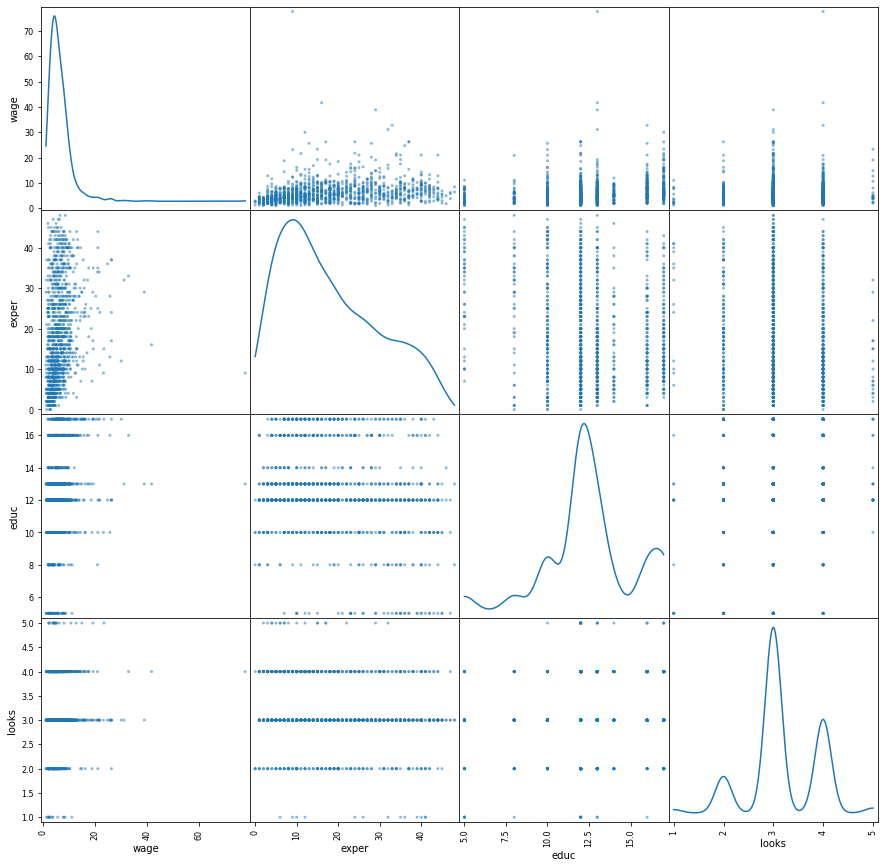

In [ ]:
pd.plotting.scatter_matrix(df[["wage", "exper", "educ", "looks"]], figsize=(15, 15), diagonal="kde")
plt.show()

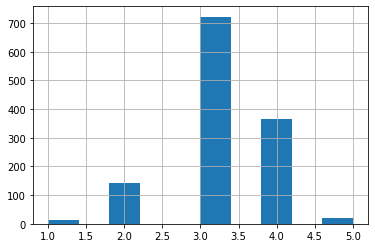

In [ ]:
df["looks"].hist()

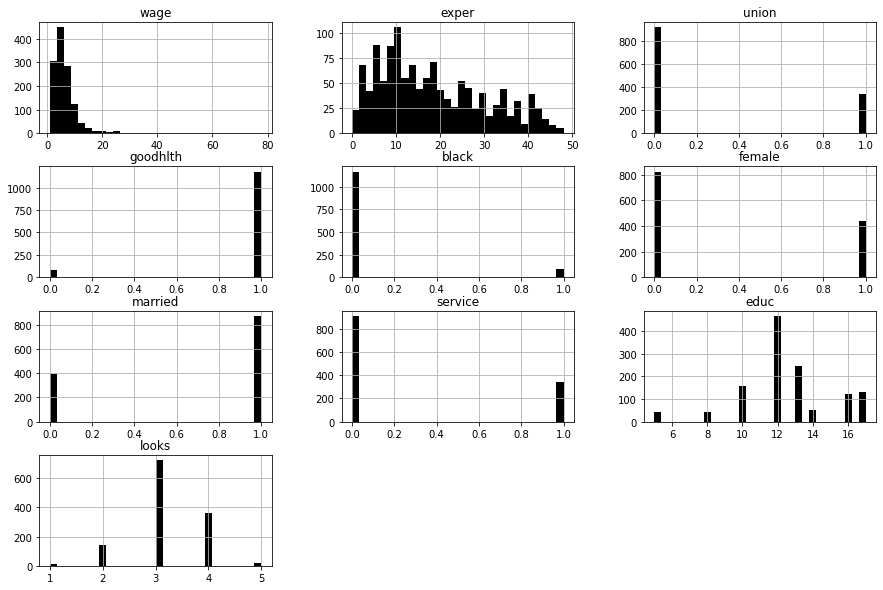

In [ ]:
df.hist(color="k", bins=30, figsize=(15, 10))
plt.show()

## titanic_train

In [ ]:
df_titanic = pd.read_csv(datasets_path+'titanic_train.csv', index_col='PassengerId')

In [ ]:
df_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_titanic[(df_titanic["Embarked"] == "C") & (df_titanic.Fare > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [ ]:
df_titanic["Age_category"] = df_titanic["Age"].apply(age_category)

In [ ]:
df_titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_titanic.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [ ]:
df_titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
from pandas._libs.hashtable import value_count
print(len(df_titanic[(df_titanic['Survived'] == 1) & (df_titanic['Age'] < 30)]) / len(df_titanic[(df_titanic['Age'] < 30)]),
len(df_titanic[(df_titanic['Survived'] == 1) & (df_titanic['Age'] > 60)]) / len(df_titanic[(df_titanic['Age'] > 60)]))

0.40625 0.22727272727272727


In [ ]:
print(df_titanic[df_titanic['Survived'] == 1].groupby('Sex')['Survived'].get_group('female').sum() / df_titanic[df_titanic.Sex == 'female'].shape[0],
      df_titanic[df_titanic['Survived'] == 1].groupby('Sex')['Survived'].get_group('male').sum() / df_titanic[df_titanic.Sex == 'male'].shape[0]).set


In [ ]:
df_titanic['NameFirst'] = df_titanic.Name.apply(lambda x: x.split(',')[1].replace('Mr. ', '').split(' ')[1])

In [ ]:
df_titanic[df_titanic.Sex == 'male']['NameFirst'].value_counts()

In [ ]:
df_titanic[df_titanic.Survived == 1][['Age', 'Fare']].hist()
df_titanic[df_titanic.Survived == 0][['Age', 'Fare']].hist()
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df_titanic[['Age', 'Survived']])

In [ ]:
df_titanic[df_titanic.Survived == 1]['Age'].mean()

In [ ]:
df_titanic[df_titanic.Survived == 0]['Age'].mean()


In [ ]:
df_titanic.groupby(['Sex', 'Pclass'])[['Pclass', 'Age']].mean()

## telecom_churn

In [ ]:
df_telecom = pd.read_csv(datasets_path + 'telecom_churn.csv')

In [ ]:
df_telecom.head()

In [ ]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)
pd.set_option("precision", 2)

In [ ]:
df_telecom.shape

In [ ]:
df_telecom.columns

In [ ]:
df_telecom.info()

In [ ]:
df_telecom["Churn"] = df_telecom["Churn"].astype("int64")

In [ ]:
df_telecom.describe()

In [ ]:
df_telecom.describe(include=['object'])

In [ ]:
df_telecom['Churn'].value_counts() # 0 - лояльный

In [ ]:
df_telecom['Area code'].value_counts(normalize=True)

In [ ]:
df_telecom["Churn"].mean()

In [ ]:
df_telecom[df_telecom["Churn"] == 1].mean()

In [ ]:
df_telecom[df_telecom["Churn"] == 1]['Total day minutes'].mean()

In [ ]:
df_telecom[(df_telecom["Churn"] == 0) & (df_telecom['International plan'] == 'No')]["Total intl minutes"].max()

In [ ]:
df_telecom[df_telecom['State'].apply(lambda state: state[0] == "W")].head()

In [ ]:
d = {'No': False, 'Yes': True}
df_telecom['International plan'] = df_telecom['International plan'].map(d)
df_telecom.head()

In [ ]:
df_telecom = df_telecom.replace({'Voice mail plan': d})

In [ ]:
df_telecom.head()

In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df_telecom.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

In [ ]:
df_telecom.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

In [ ]:
pd.crosstab(df_telecom["Churn"], df_telecom["International plan"])

In [ ]:
pd.crosstab(df_telecom["Churn"], df_telecom["Voice mail plan"], normalize=True)

In [ ]:
df_telecom.pivot_table(["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean").head(10)

In [ ]:
df_telecom.groupby('Area code')["Total day calls", "Total eve calls", "Total night calls"].agg(np.mean)

In [ ]:
total_calls = df_telecom["Total day calls"] + df_telecom["Total eve calls"] + df_telecom["Total night calls"] + df_telecom["Total intl calls"]

In [ ]:
df_telecom.insert(loc=len(df_telecom.columns), column='Total calls', value=total_calls)

In [ ]:
df_telecom

In [ ]:
df_telecom["Total charge"] = (df_telecom["Total day charge"] + df_telecom["Total eve charge"] + df_telecom["Total night charge"] + df_telecom["Total intl charge"])
df_telecom.head()

In [ ]:
df_telecom = df_telecom.drop(["Total charge", "Total calls"], axis=1)

In [ ]:
df_telecom.drop([1, 2]).head()

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)

In [ ]:
pd.crosstab(df_telecom["Churn"], df_telecom["International plan"], margins=True)

In [ ]:
sns.countplot(x='International plan', hue='Churn', data=df_telecom)
plt.savefig("int_plan_and_churn.png", dpi=300);

In [ ]:
pd.crosstab(df_telecom.Churn, df_telecom['Customer service calls'], margins=True)

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df_telecom)
plt.savefig("serv_calls__and_churn.png", dpi=300);

In [ ]:
df_telecom["Many_service_calls"] = (df_telecom["Customer service calls"] > 3).astype("int")

pd.crosstab(df_telecom["Many_service_calls"], df_telecom["Churn"], margins=True)

In [ ]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df_telecom)
plt.savefig("serv_calls__and_churn.png", dpi=300);

In [ ]:
pd.crosstab(df_telecom['Many_service_calls'] & df_telecom['International plan'], df_telecom['Churn'])

# Lesson 2

### Визуализация

In [ ]:
df_telecom = pd.read_csv(datasets_path + 'telecom_churn.csv')

In [ ]:
df_telecom['Total day minutes'].hist();

In [ ]:
sns.boxplot(df_telecom['Total day minutes']);

In [ ]:
df_telecom.hist();

In [ ]:
df_telecom['State'].value_counts()

In [ ]:
df_telecom['Churn'].value_counts().head()


In [ ]:
sns.countplot(df_telecom['Churn']);

In [ ]:
sns.countplot(df_telecom['State']);


In [ ]:
sns.countplot(df_telecom[df_telecom['State'].isin(df_telecom['State'].value_counts().head().index)]['State']);

In [ ]:
feat = [f for f in df_telecom.columns if 'charge' in f]
feat

In [ ]:
df_telecom[feat].hist();

In [ ]:
sns.pairplot(df_telecom[feat]);

In [ ]:
df_telecom['Churn'] = df_telecom['Churn'].map({False: 0, True: 1})

In [ ]:
plt.scatter(df_telecom['Total eve charge'], 
            df_telecom['Total night charge'], 
            color=df_telecom['Churn'].map({0: 'blue', 1: 'red'}),
            label='xyz');
plt.xlabel('Вечерние начисления $a^2 + $abs'); #LaTex
plt.ylabel('Международные начисления');
plt.legend();

In [ ]:
plt.scatter(df_telecom[df_telecom['Churn'].map({0:False, 1:True})]['Total eve charge'],
            df_telecom[df_telecom['Churn'].map({0:False, 1:True})]['Total night charge']
            , color = 'blue', label='churn');
plt.scatter(df_telecom[~df_telecom['Churn'].map({0:False, 1:True})]['Total eve charge'],
            df_telecom[~df_telecom['Churn'].map({0:False, 1:True})]['Total night charge']
            , color = 'red', label='loyal');
plt.xlabel('Вечерние начисления');
plt.ylabel('Международные начисления');
plt.title('Распределение начислений для лояльных/ушедших');
plt.legend();

In [ ]:
df_telecom[df_telecom['Churn'].map({0: False, 1:True})]

In [ ]:
df_telecom.corr()

In [ ]:
sns.heatmap(df_telecom.corr())

In [ ]:
df_telecom.head()

In [ ]:
df_telecom.drop(feat, axis=1, inplace=True)

In [ ]:
sns.heatmap(df_telecom.corr())

In [ ]:
sns.boxplot(x='Churn', y='Total day minutes', data=df_telecom);

In [ ]:
sns.boxplot(x='State', y='Total day minutes', data=df_telecom);

In [ ]:
sns.violinplot(x="Churn", y="Total day minutes", data=df_telecom);

In [ ]:
df_telecom.groupby('International plan')['Total day minutes'].mean()

In [ ]:
sns.boxplot(x='International plan', y='Total day minutes', data=df_telecom);

In [ ]:
pd.crosstab(df_telecom['Churn'], df_telecom['International plan'])

In [ ]:
sns.countplot(x='International plan', hue='Churn', data=df_telecom);

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df_telecom);


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

In [ ]:
df_telecom_2 = df_telecom.drop(['State'], axis=1)

In [ ]:
df_telecom_2["International plan"] = df_telecom_2["International plan"].map({"Yes": 1, "No": 0})
df_telecom_2["Voice mail plan"] = df_telecom_2["Voice mail plan"].map({"Yes": 1, "No": 0})

In [ ]:
df_telecom_2.info()

In [ ]:
tsne.fit(df_telecom_2)

In [ ]:
dir(tsne)

In [ ]:
tsne.embedding_.shape

In [ ]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1]);

In [ ]:
plt.scatter(
    tsne.embedding_[df_telecom_2['Churn'].values, 0],
    tsne.embedding_[df_telecom_2['Churn'].values, 1],
    color='red',
);
plt.scatter(
    tsne.embedding_[~df_telecom_2['Churn'].values, 0],
    tsne.embedding_[~df_telecom_2['Churn'].values, 1],
    color='blue',
);

### mlcourse_open_first_survey_parsed.csv

In [ ]:
pool_data = pd.read_csv(datasets_path + 'mlcourse_open_first_survey_parsed.csv', index_col='id')

In [ ]:
pool_data.head()

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [ ]:
pool_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                                 2944 non-null   object 
 1   Представьтесь в 2-3 фразах                                                                                                                2944 non-null   object 
 2   Работали ли Вы с Jupyter notebooks?                                                                                                       2931 non-null   object 
 3   Что Вы ждете от курса?                               

In [ ]:
pool_data.shape

(2944, 14)

In [ ]:
rename_dict = dict(
    zip(pool_data.columns, 
        ["time",
            "intro",
            "jupyter",
            "expect",
            "sport",
            "personal",
            "math_level",
            "quest1",
            "quest2",
            "quest3",
            "fib_gen",
            "python",
            "github",
            "movie",])
)
rename_dict

{'Timestamp': 'time',
 'Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)': 'math_level',
 'Ладно, посерьезней: согласны ли Вы на обработку персональных данных?': 'personal',
 'Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]': 'quest2',
 'Оцените свой уровень владения GitHub': 'github',
 'Посоветуйте хороший фильм в стиле "Игра в имитацию" :)': 'movie',
 'Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?': 'sport',
 'Представьтесь в 2-3 фразах': 'intro',
 'Работали ли Вы с Jupyter notebooks?': 'jupyter',
 'Сколько параметров у нормального распределения?': 'quest3',
 'Сможете написать на Python генератор чисел Фибоначчи?': 'fib_gen',
 'Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro': 'python',
 'Чему равна дисперсия равномерного на [0,6] распределения?': 'quest1',
 'Что Вы ждете от курса?': 'expect'}

In [ ]:
pool_data.rename(columns=rename_dict, inplace=True)

In [ ]:
pool_data.head(2)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [ ]:
pool_data['jupyter'].value_counts()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
                                                                ... 
пару раз включал                                                   1
Пробовал, не впечатлился. Попробую еще раз.                        1
Работал с Pandas и numpy                                           1
Знаю о инх, не работал.                                            1
чуток                                                              1
Name: jupyter, Length: 85, dtype: int64

In [ ]:
pool_data['jupyter'].map({'Да': 1, 'Нет': 0})

id
0       1.0
1       1.0
2       1.0
3       1.0
5       1.0
       ... 
3210    1.0
3212    1.0
3213    1.0
3214    1.0
3215    1.0
Name: jupyter, Length: 2944, dtype: float64

In [ ]:
pool_data['jupyter'].map({'Да': 1, 'Нет': 0}).unique()

array([ 1., nan,  0.])

In [ ]:
pool_data['jupyter'].map({'Да': 1, 'Нет': 0}).value_counts()

1.0    2071
0.0     766
Name: jupyter, dtype: int64

In [ ]:
jupyter_levels = pool_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2)
jupyter_levels.value_counts()

1.0    2071
0.0     766
2.0     107
Name: jupyter, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


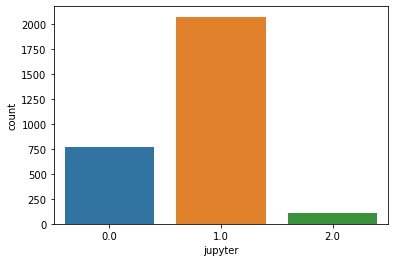

In [ ]:
sns.countplot(jupyter_levels);

In [ ]:
pool_data.sport.value_counts().head()

Футбол       197
футбол       113
Баскетбол    113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

In [ ]:
pool_data['quest3'].value_counts()

2.0    2519
1.0      86
3.0      80
4.0      40
Name: quest3, dtype: int64

In [ ]:
pool_data['quest3'].unique()

array([ 2., nan,  1.,  4.,  3.])

In [ ]:
pool_data['quest3'].nunique()

4

In [ ]:
pool_data['quest3'].isna().value_counts()

False    2725
True      219
Name: quest3, dtype: int64

In [ ]:
(pool_data['quest3'] == 2).dropna().sum()

2519

In [ ]:
pool_data['quest3'].isna().value_counts()

False    2725
True      219
Name: quest3, dtype: int64

In [ ]:
pool_data['quest3'][~pool_data['quest3'].isnull()].value_counts()

2.0    2519
1.0      86
3.0      80
4.0      40
Name: quest3, dtype: int64

In [ ]:
(pool_data['quest3'] == 2).dropna().sum() / pool_data['quest3'][~pool_data['quest3'].isnull()].shape[0]

0.9244036697247706

In [ ]:
all_words = np.concatenate(pool_data['intro'].apply(lambda s: s.strip().split()).values)

In [ ]:
len(all_words)

26533

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords


In [ ]:
stopwords.words('russian')[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [ ]:
word_series = pd.Series(list(all_words))
word_series[
             ~word_series.isin(stopwords.words('russian'))
].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
dtype: int64

## video_games_sales.csv

In [ ]:
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams

rcParams["figure.figsize"] = 8, 5

In [ ]:
df_game = pd.read_csv(datasets_path + 'video_games_sales.csv').dropna()

In [ ]:
df_game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
df_game.shape

(6825, 16)

In [ ]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [ ]:
df_game["User_Score"] = df_game.User_Score.astype("float64")
df_game["Year_of_Release"] = df_game.Year_of_Release.astype("int64")
df_game["User_Count"] = df_game.User_Count.astype("int64")
df_game["Critic_Count"] = df_game.Critic_Count.astype("int64")

In [ ]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df_game[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


In [ ]:
df_game[[x for x in df_game.columns if "Sales" in x] + ["Year_of_Release"]]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release
0,41.36,28.96,3.77,8.45,82.53,2006
2,15.68,12.76,3.79,3.29,35.52,2008
3,15.61,10.93,3.28,2.95,32.77,2009
6,11.28,9.14,6.50,2.88,29.80,2006
7,13.96,9.18,2.93,2.84,28.92,2006
...,...,...,...,...,...,...
16667,0.01,0.00,0.00,0.00,0.01,2001
16677,0.01,0.00,0.00,0.00,0.01,2002
16696,0.00,0.01,0.00,0.00,0.01,2014
16700,0.01,0.00,0.00,0.00,0.01,2011


In [ ]:
df_game[[x for x in df_game.columns if "Sales" in x] + ["Year_of_Release"]].groupby('Year_of_Release').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10
1997,15.34,8.67,9.01,2.02,35.01
1998,18.13,12.13,10.81,2.14,43.18
1999,23.32,15.69,9.67,2.45,51.17
2000,39.34,25.20,11.27,5.49,81.24


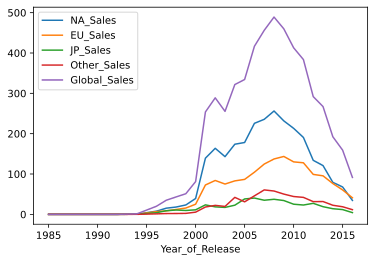

In [ ]:
df_game[[x for x in df_game.columns if "Sales" in x] + ["Year_of_Release"]].groupby('Year_of_Release').sum().plot()

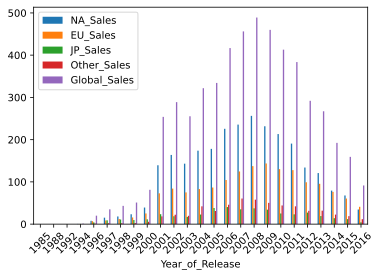

In [ ]:
df_game[[x for x in df_game.columns if "Sales" in x] + 
        ["Year_of_Release"]].groupby('Year_of_Release').sum().plot(kind='bar', rot=45)


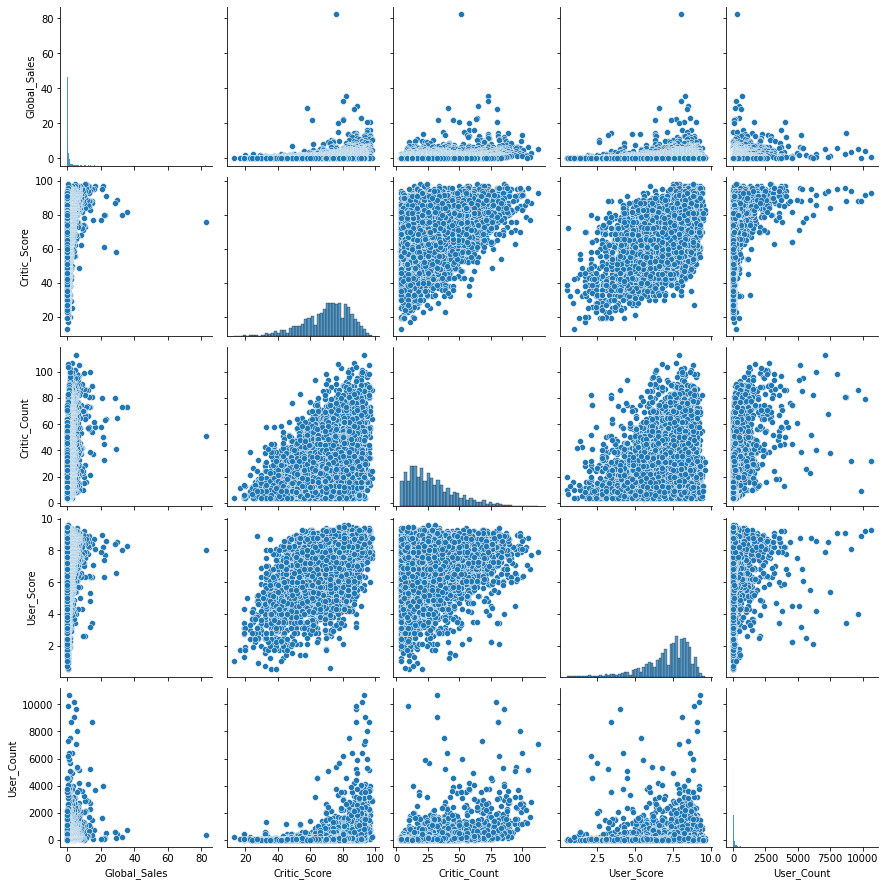

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df_game[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


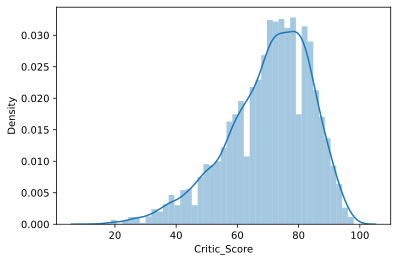

In [ ]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_game.Critic_Score);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


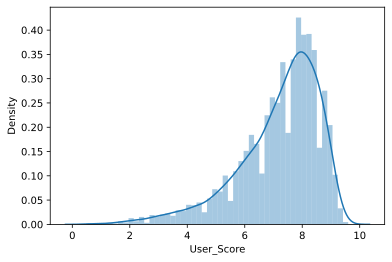

In [ ]:
sns.distplot(df_game['User_Score'])

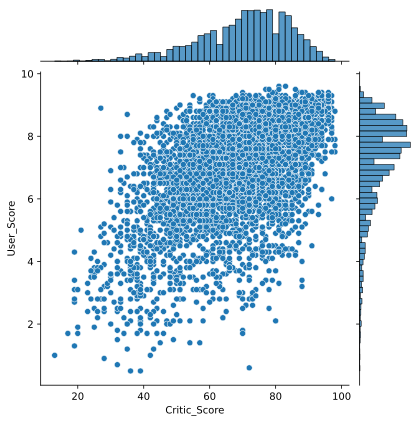

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df_game, kind='scatter');

In [ ]:
df_game['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [ ]:
df_game['Platform'].value_counts().index.values

array(['PS2', 'X360', 'PS3', 'PC', 'XB', 'Wii', 'DS', 'PSP', 'GC', 'PS4',
       'GBA', 'XOne', '3DS', 'PS', 'PSV', 'WiiU', 'DC'], dtype=object)

In [ ]:
top_platforms = df_game.Platform.value_counts().head(5).index.values
top_platforms

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

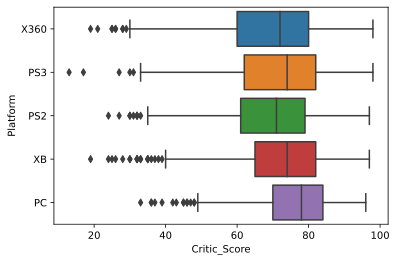

In [ ]:
sns.boxplot(y='Platform', x='Critic_Score', data=df_game[df_game.Platform.isin(top_platforms)], orient='h');

In [ ]:
df_game.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc=sum)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,NaN,1.33,0.56,NaN,0.12,NaN,0.20,0.68,0.05,0.52,1.09,NaN
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


In [ ]:
df_game.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc=sum).fillna(0).applymap(float)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


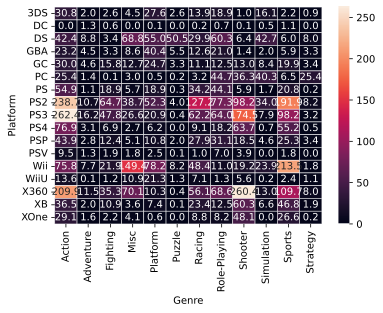

In [ ]:
platform_genre_sales = df_game.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=0.5)

# Lesson 3

## Дерево решений и метод ближайших соседей


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


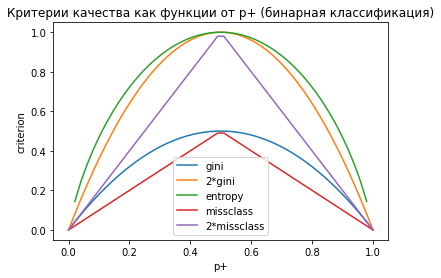

In [4]:
plt.rcParams["figure.figsize"] = (6, 4)
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label="gini")
plt.plot(xx, [4 * x * (1 - x) for x in xx], label="2*gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Критерии качества как функции от p+ (бинарная классификация)")
plt.legend();

In [8]:
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)
print(train_data.shape, train_labels.shape)

train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
print(train_data.shape, train_labels.shape)

(100, 2) (100,)
(200, 2) (200,)


In [9]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))

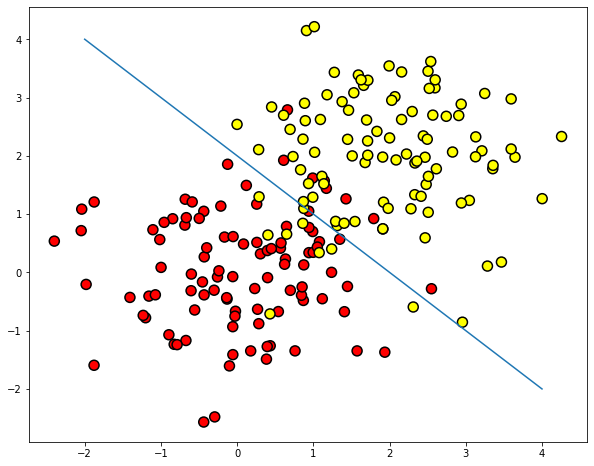

In [12]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

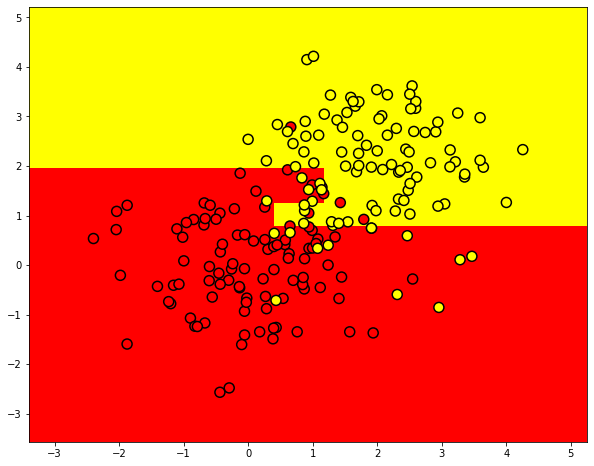

In [16]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data, train_labels)

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

In [20]:
from io import StringIO
import pydotplus
from ipywidgets import Image
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=["x1", "x2"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xb9\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xe6\xdf3…

In [21]:
data = pd.DataFrame(
    {
        "Возраст": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Невозврат кредита": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

In [22]:
data.sort_values("Возраст")

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [23]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Возраст"].values.reshape(-1, 1), data["Невозврат кредита"].values)

DecisionTreeClassifier(random_state=17)

In [28]:
dot_data = StringIO()
export_graphviz(age_tree, feature_names=["Возраст"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x027\x00\x00\x03\x07\x08\x06\x00\x00\x00\xc5%v\xb7\x…

In [29]:
data2 = pd.DataFrame(
    {
        "Возраст": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Зарплата": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Невозврат кредита": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

In [30]:
data2.sort_values("Возраст")

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [31]:
data2.sort_values("Зарплата")

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [33]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(
    data2[["Возраст", "Зарплата"]].values, data2["Невозврат кредита"].values
);
dot_data = StringIO()
export_graphviz(
    age_sal_tree, feature_names=["Возраст", "Зарплата"], out_file=dot_data, filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02W\x00\x00\x02|\x08\x02\x00\x00\x00\\2\x13&\x00\x0…

In [34]:
n_train = 150
n_test = 1000
noise = 0.1


def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [37]:
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

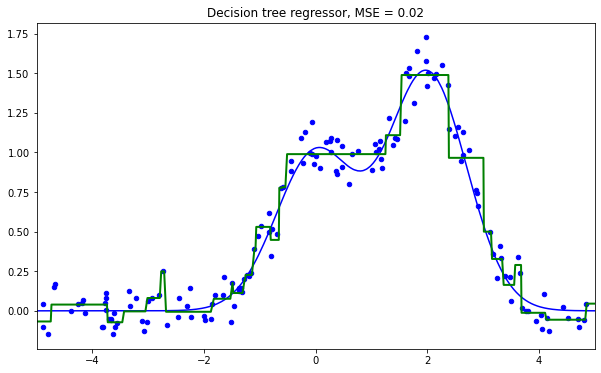

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()

## telecom_churn.csv

In [39]:
df = pd.read_csv(datasets_path + "telecom_churn.csv")

In [45]:
pd.factorize(df['International plan'])

(array([0, 0, 0, ..., 0, 1, 0]), Index(['No', 'Yes'], dtype='object'))

In [46]:
df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
df.drop(["State", "Churn"], axis=1, inplace=True)

In [47]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [49]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    df.values, y, test_size=0.3, random_state=17
)

In [54]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [57]:
%%time
tree.fit(X_train, y_train)

CPU times: user 18.9 ms, sys: 2.1 ms, total: 21 ms
Wall time: 27.1 ms


DecisionTreeClassifier(max_depth=5, random_state=17)

In [58]:
%%time
knn.fit(X_train, y_train)

CPU times: user 2.13 ms, sys: 0 ns, total: 2.13 ms
Wall time: 2.33 ms


KNeighborsClassifier(n_neighbors=10)

In [60]:
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.94

In [61]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.881

In [63]:
tree_params = {"max_depth": range(1, 11), "max_features": range(4, 19)}

In [65]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [66]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [67]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 6, 'max_features': 17}, 0.94257014456259)

In [68]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.946

In [71]:
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)
knn_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1))])

In [72]:
knn_params = {"knn__n_neighbors": range(1, 10)}

In [73]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

In [74]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [75]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.8859867109023905)

In [76]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

In [78]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.9494233119813256


In [79]:
forest_params = {"max_depth": range(1, 11), "max_features": range(4, 19)}
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)
forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [80]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.953

In [81]:
dot_data = StringIO()
export_graphviz(
    tree_grid.best_estimator_, feature_names=df.columns, out_file=dot_data, filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x12\xcf\x00\x00\x03\x91\x08\x02\x00\x00\x00,\x15\x1c…

## Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST

In [82]:
from sklearn.datasets import load_digits

In [83]:
data = load_digits()
X, y = data.data, data.target

In [84]:
X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

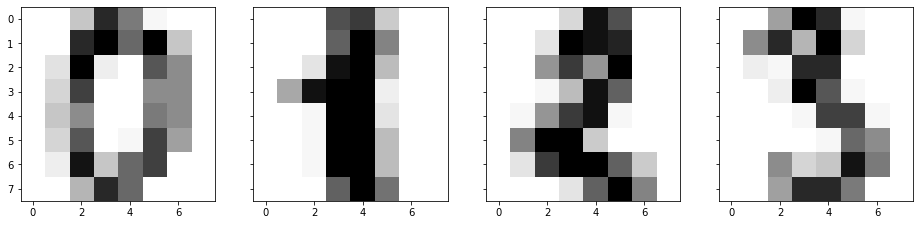

In [85]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [86]:
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [87]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [88]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [89]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.9740740740740741, 0.6666666666666666)

In [90]:
tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}

In [91]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [92]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [93]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [94]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8425925925925926

In [95]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9864858028204642

In [96]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
accuracy_score(y_holdout, knn.predict(X_holdout))

0.9833333333333333

In [97]:
np.mean(
    cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5)
)

0.9753462341111744

In [98]:
rf = RandomForestClassifier(random_state=17, n_jobs=-1).fit(X_train, y_train)
accuracy_score(y_holdout, rf.predict(X_holdout))

0.9666666666666667

## Сложный случай для деревьев

In [100]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

In [101]:
X, y = form_linearly_separable_data()

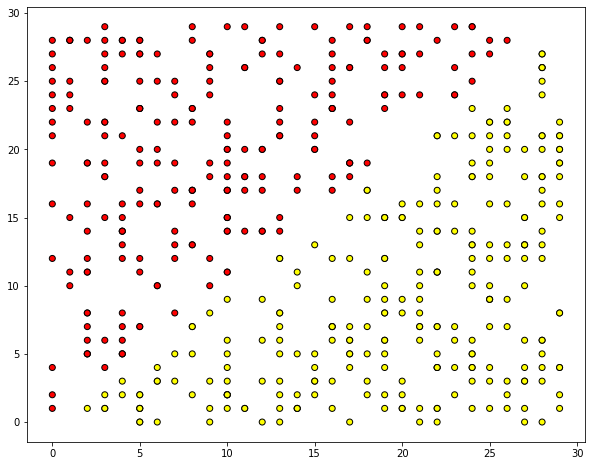

In [102]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn", edgecolors="black");

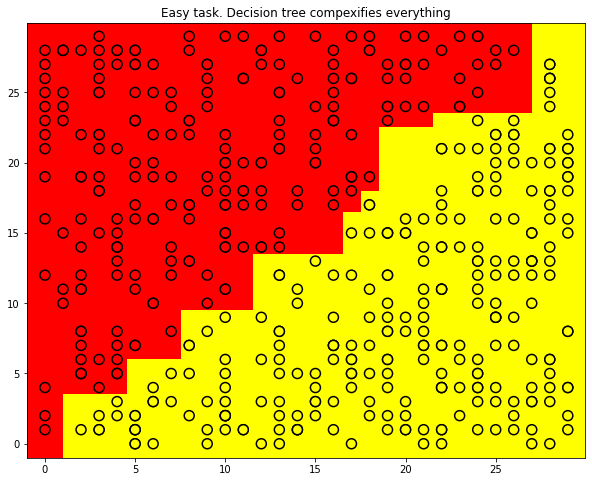

In [103]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X, eps=0.05)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task. Decision tree compexifies everything");

In [105]:
dot_data = StringIO()
export_graphviz(tree, feature_names=["x1", "x2"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x08\x98\x00\x00\x03\x07\x08\x06\x00\x00\x00\x7f\xd9\…

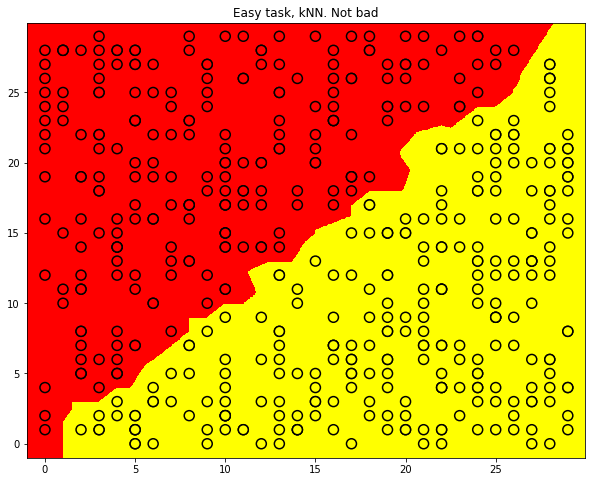

In [106]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X, eps=0.05)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task, kNN. Not bad");

## Сложный случай для метода ближайших соседей

In [107]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # первый признак пропорционален целевому
    x1 = 0.3 * y

    # остальные признаки – шум

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

In [111]:
X, y = form_noisy_data()

In [109]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

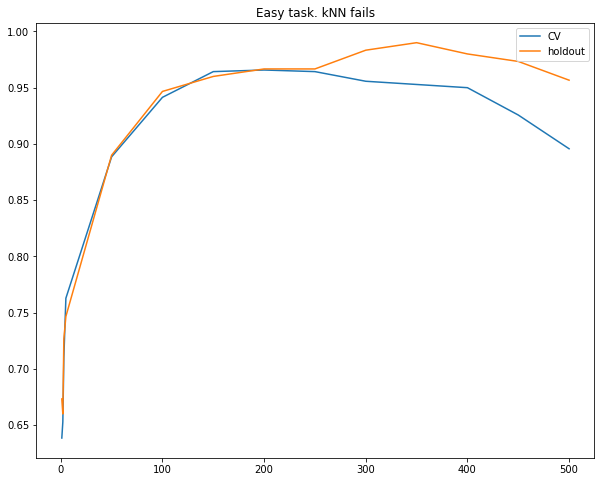

In [112]:

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label="CV")
plt.plot(n_neighb, holdout_scores, label="holdout")
plt.title("Easy task. kNN fails")
plt.legend();

In [113]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print("Decision tree. CV: {}, holdout: {}".format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0
